<a href="https://colab.research.google.com/github/Raghavendra1178/Brain-Tumour-Identification-Using-CNN/blob/master/normalcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
from os import listdir
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,layers
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras import layers
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve
import seaborn as sns

In [ ]:
imagesize=256
batchsize=64
channels=3
epochs=10

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"/content/drive/MyDrive/PROJECT/Data",
    shuffle=True,
    image_size=(imagesize,imagesize),
    batch_size=batchsize
)

Found 2968 files belonging to 2 classes.


In [ ]:
classnames=dataset.class_names
classnames

['notumor', 'yestumor']

In [ ]:
len(dataset)


47

In [ ]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(64, 256, 256, 3)
[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1
 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0]


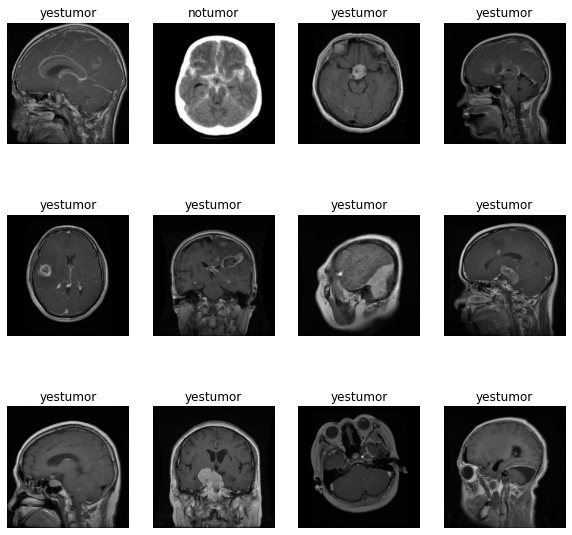

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classnames[label_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

37

In [ ]:
len(val_ds)

4

In [ ]:
len(test_ds)

6

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(imagesize,imagesize),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
inputshape=(batchsize,imagesize,imagesize,channels)
n_classes=2
model=models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=inputshape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

In [ ]:
model.build(input_shape=inputshape)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (64, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (64, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (64, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (64, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (64, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (64, 60, 60, 64)         

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy']

)

In [ ]:
history=model.fit(train_ds,
                  epochs=10,
                  batch_size=batchsize,
                  verbose=1,
                  validation_data=val_ds)

Epoch 1/10
37/37 [==============================] - 306s 467ms/step - loss: 0.4502 - accuracy: 0.8329 - val_loss: 0.2959 - val_accuracy: 0.8711
Epoch 2/10
37/37 [==============================] - 7s 202ms/step - loss: 0.2567 - accuracy: 0.9016 - val_loss: 0.1368 - val_accuracy: 0.9570
Epoch 3/10
37/37 [==============================] - 7s 201ms/step - loss: 0.1752 - accuracy: 0.9330 - val_loss: 0.1010 - val_accuracy: 0.9531
Epoch 4/10
37/37 [==============================] - 7s 202ms/step - loss: 0.1341 - accuracy: 0.9502 - val_loss: 0.0856 - val_accuracy: 0.9688
Epoch 5/10
37/37 [==============================] - 7s 200ms/step - loss: 0.1005 - accuracy: 0.9592 - val_loss: 0.0670 - val_accuracy: 0.9766
Epoch 6/10
37/37 [==============================] - 8s 203ms/step - loss: 0.0889 - accuracy: 0.9656 - val_loss: 0.0672 - val_accuracy: 0.9766
Epoch 7/10
37/37 [==============================] - 7s 201ms/step - loss: 0.0586 - accuracy: 0.9764 - val_loss: 0.0335 - val_accuracy: 0.9961
Epoc

In [ ]:
model.evaluate(test_ds)

6/6 [==============================] - 8s 80ms/step - loss: 0.0677 - accuracy: 0.9870


[0.06767229735851288, 0.9869791865348816]

In [ ]:
history.params

{'epochs': 10, 'steps': 37, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.8329038023948669,
 0.9016323089599609,
 0.9329897165298462,
 0.9501718282699585,
 0.9591924548149109,
 0.9656357169151306,
 0.9763745665550232,
 0.9866838455200195,
 0.9772336483001709,
 0.9901202917098999]

In [ ]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

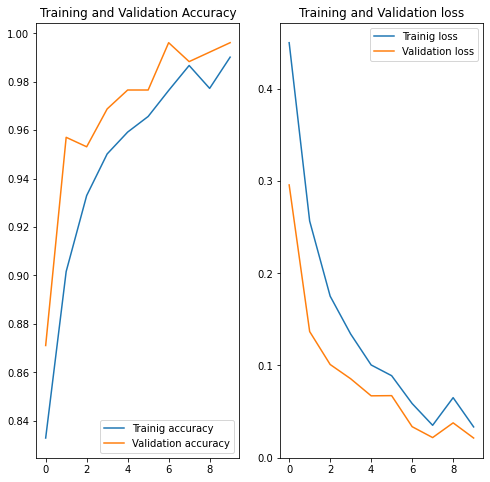

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10),acc,label='Trainig accuracy') ## epochs=10
plt.plot(range(10),val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(10),loss,label='Trainig loss') ## epochs=10
plt.plot(range(10),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

First image to predict
First images actual label yestumor
yestumor


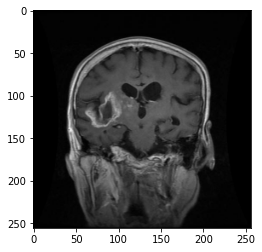

In [ ]:
for images_batch,labels_batch in test_ds.take(1):
    firstimage=images_batch[0].numpy().astype('uint8')
    firstlabel=labels_batch[0]
    
    print("First image to predict")
    plt.imshow(firstimage)
    print("First images actual label",classnames[firstlabel])
    
    batch_prediction=model.predict(images_batch)
    print(classnames[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) ## create a batch
    
    predictions=model.predict(img_array)
    
    predicted_class=classnames[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    
    return predicted_class,confidence

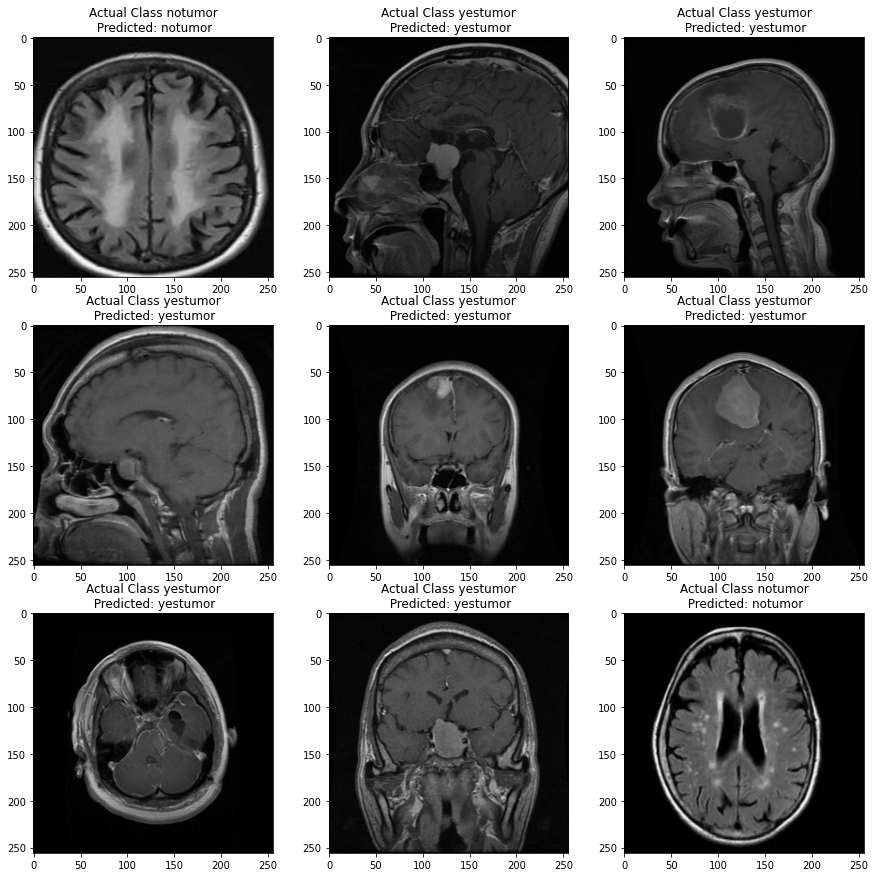

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=classnames[labels[i]]
        
        
        plt.title("Actual Class "+actual_class+"\n Predicted: "+predicted_class)
        plt.axis=("off")

In [ ]:
model.save("normalcnn.h5")